In [ ]:
#look at total sales, drivers of sales, where the highest sales are coming from ?
# Deep dive into customer segments – define your recommendation from your insights, 
# determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis

In [13]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


#data collection
df = pd.read_csv("C:\DataAnalysisProject\QVI_transaction_data_test.csv") 
df 

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Barbara\AppData\Local\Temp\ipykernel_14952\700029350.py:7: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\DataAnalysisProject\QVI_transaction_data_test.csv")


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [38]:
df.shape


(264836, 8)

In [43]:
required_collums = ['PROD_NAME', 'TOT_SALES']
df = df[required_collums]
df.head

<bound method NDFrame.head of                                        PROD_NAME  TOT_SALES
0         Natural Chip        Compny SeaSalt175g        6.0
1                       CCs Nacho Cheese    175g        6.3
2         Smiths Crinkle Cut  Chips Chicken 170g        2.9
3         Smiths Chip Thinly  S/Cream&Onion 175g       15.0
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g       13.8
...                                          ...        ...
264831   Kettle Sweet Chilli And Sour Cream 175g       10.8
264832             Tostitos Splash Of  Lime 175g        4.4
264833                  Doritos Mexicana    170g        8.8
264834   Doritos Corn Chip Mexican Jalapeno 150g        7.8
264835             Tostitos Splash Of  Lime 175g        8.8

[264836 rows x 2 columns]>

In [62]:
df.duplicated().sum()

np.int64(264281)

In [65]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

C:\Users\Barbara\AppData\Local\Temp\ipykernel_21536\2101504858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


np.int64(0)

In [66]:
df['TOT_SALES'].isnull().sum()

np.int64(0)

In [67]:
df['PROD_NAME'].isnull().sum()

np.int64(0)

In [4]:
df2 = df = pd.read_csv("C:\DataAnalysisProject\QVI_purchase_behaviour.csv")
df2

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Barbara\AppData\Local\Temp\ipykernel_14952\2230179740.py:1: SyntaxWarning: invalid escape sequence '\D'
  df2 = df = pd.read_csv("C:\DataAnalysisProject\QVI_purchase_behaviour.csv")


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [70]:
df2.shape

(72637, 3)

In [71]:
required_collums = ['LIFESTAGE', 'PREMIUM_CUSTOMER']
df2 = df[required_collums]
df2.head

<bound method NDFrame.head of                     LIFESTAGE PREMIUM_CUSTOMER
0       YOUNG SINGLES/COUPLES          Premium
1       YOUNG SINGLES/COUPLES       Mainstream
2              YOUNG FAMILIES           Budget
3       OLDER SINGLES/COUPLES       Mainstream
4      MIDAGE SINGLES/COUPLES       Mainstream
...                       ...              ...
72632  MIDAGE SINGLES/COUPLES       Mainstream
72633          YOUNG FAMILIES       Mainstream
72634          YOUNG FAMILIES          Premium
72635          OLDER FAMILIES           Budget
72636   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 2 columns]>

In [72]:
df2.duplicated().sum()

np.int64(72616)

In [73]:
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

C:\Users\Barbara\AppData\Local\Temp\ipykernel_21536\578404736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


np.int64(0)

In [74]:
df2['LIFESTAGE'].isnull().sum()

np.int64(0)

In [75]:
df2['PREMIUM_CUSTOMER'].isnull().sum()

np.int64(0)

In [103]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


In [104]:
df2.head(2)

,LIFESTAGE,PREMIUM_CUSTOMER
0,YOUNG SINGLES/COUPLES,Premium
1,YOUNG SINGLES/COUPLES,Mainstream


In [126]:
# Calculate the total sales
total_sales = df['TOT_SALES'].sum()
print(f'Total Sales: {total_sales}')

Total Sales: 1934415.0000000002


In [ ]:
# Total Sales by store
sales_by_store = df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False)
print(sales_by_store)

STORE_NBR
226    18905.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
         ...   
206        7.60
252        7.40
11         6.70
76         6.00
211        5.20
Name: TOT_SALES, Length: 272, dtype: float64


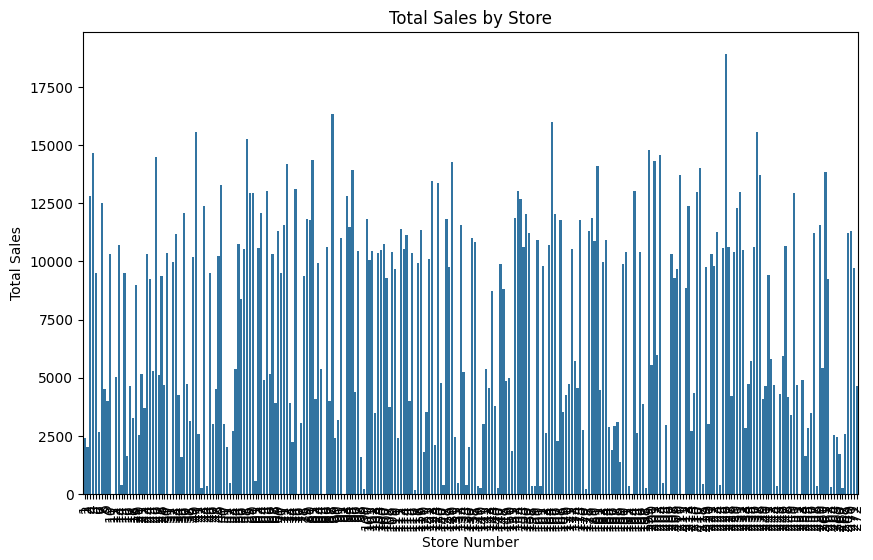

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_store.index, y=sales_by_store.values)
plt.title("Total Sales by Store")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

In [21]:
# Total sales by product 
sales_by_product = df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False)
print(sales_by_product)

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
                                             ...   
WW Crinkle Cut      Chicken 175g             4702.2
Sunbites Whlegrn    Crisps Frch/Onin 90g     4600.2
WW Crinkle Cut      Original 175g            4532.2
Woolworths Mild     Salsa 300g               4234.5
Woolworths Medium   Salsa 300g               4050.0
Name: TOT_SALES, Length: 114, dtype: float64


In [22]:
# Total Sales by quantity
total_by_qty = df.groupby('PROD_QTY')['TOT_SALES'].sum().sort_values(ascending=False)
print(total_by_qty)

PROD_QTY
2      1811775.20
1       102220.00
5         8183.15
4         5976.60
3         4960.05
200       1300.00
Name: TOT_SALES, dtype: float64


In [29]:
# Identify the top performing store and product
top_store = sales_by_store.idxmax()
top_store_sales = sales_by_store.max()

top_product = sales_by_product.idxmax()
top_product_sales = sales_by_product.max()

print(f"The highest performing store is Store #{top_store} with total sales of {top_store_sales}.")
print(f"The top-selling product is '{top_product}' with total sales of {top_product_sales}.")


The highest performing store is Store #226 with total sales of 18905.45.
The top-selling product is 'Dorito Corn Chp     Supreme 380g' with total sales of 40352.0.
